In [1]:
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
import numpy as np

import keras
from keras import backend as K
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import cv2

In [10]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [11]:
x_train.shape

(50000, 32, 32, 3)

In [12]:

img1 = x_train[[i for i in range(9)]].astype('float32')
img1 /= 255
h_dim = np.shape(img1)[0]
w_dim = np.shape(img1)[1]
num_channel = np.shape(img1)[2]

In [13]:
img1 = np.array([cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) for im in img1])

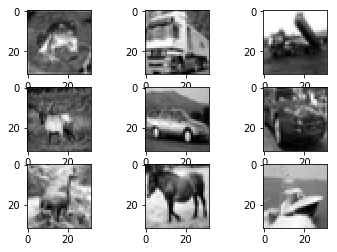

In [14]:
j=1
for i in range(0, 9):
        plt.subplot(3,3 , j)
        plt.imshow(img1[i], cmap=plt.get_cmap('gray'))
        j+=1


In [15]:
def imageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None):
    datagen = ImageDataGenerator(featurewise_center=featurewise_center, 
                                 samplewise_center=samplewise_center, 
                                 featurewise_std_normalization=featurewise_std_normalization, 
                                 samplewise_std_normalization=samplewise_std_normalization, 
                                 zca_whitening=zca_whitening, 
                                 zca_epsilon=zca_epsilon, 
                                 rotation_range=rotation_range, 
                                 width_shift_range=width_shift_range,
                                 height_shift_range=height_shift_range, 
                                 brightness_range=brightness_range, 
                                 shear_range=shear_range, 
                                 zoom_range=zoom_range, 
                                 channel_shift_range=channel_shift_range, 
                                 fill_mode=fill_mode, 
                                 cval=cval, 
                                 horizontal_flip=horizontal_flip, 
                                 vertical_flip=vertical_flip, 
                                 rescale=rescale, 
                                 preprocessing_function=preprocessing_function, 
                                 data_format=data_format, 
                                 validation_split=validation_split, 
                                 dtype=dtype)
    datagen.fit(img1.reshape(img1.shape[0], 1, img1.shape[-1],img1.shape[-1]))
    img11=[]
    j=1
    for X_batch, y_batch in datagen.flow(img1.reshape(img1.shape[0], 1, img1.shape[-1], img1.shape[-1]), y_train[[0,1,2,3,4,5,6,7,8]], batch_size=9):
        for i in range(0, 9):
            if i==3:
                j=8
            elif i==6:
                j=15
            plt.subplot(3,7 , j)
            plt.imshow(X_batch[i][0], cmap=plt.get_cmap('gray'))        
            img11.append(X_batch[i])
            j+=1
        break

    j=5
    for i in range(0, 9):
            if i==3:
                j=12
            elif i==6:
                j=19
            plt.subplot(3,7 , j)
            plt.imshow(img1[i], cmap=plt.get_cmap('gray'))
            j+=1
    plt.show()

# ImageDataGenerator class in keras

### featurewise_center and featurewise_std_normalization

featurewise_center: Boolean. Set input mean to 0 over the dataset, feature-wise.

featurewise_std_normalization: Boolean. Divide inputs by std of the dataset, feature-wise.

/home/gauravkoradiya/Downloads/Enter/lib/python3.6/site-packages/keras_preprocessing/image.py:1358: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (9, 1, 32, 32) (32 channels).
  ' channels).')
/home/gauravkoradiya/Downloads/Enter/lib/python3.6/site-packages/keras_preprocessing/image.py:1643: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (9, 1, 32, 32) (32 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


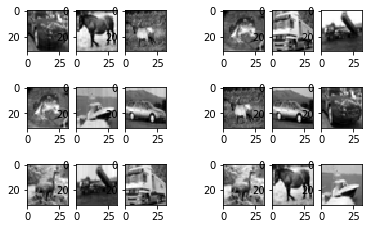

In [16]:
imageDataGenerator(
     featurewise_center=True, 
        samplewise_center=False,  
        featurewise_std_normalization=True,  
        samplewise_std_normalization=False,  
        zca_whitening=False)


### samplewise_center and samplewise_std_normalization

samplewise_center: Boolean. Set each sample mean to 0.

samplewise_std_normalization: Boolean. Divide each input by its std.

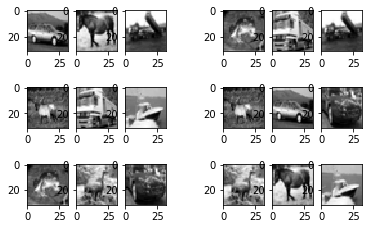

In [17]:
imageDataGenerator(
     featurewise_center=False, 
        samplewise_center=True,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=True,  
        zca_whitening=False)


### ZCA whitening 

In [ ]:
import numpy as np

def zca_whitening_matrix(X):
    """
    Function to compute ZCA whitening matrix (aka Mahalanobis whitening).
    INPUT:  X: [M x N] matrix.
        Rows: Variables
        Columns: Observations
    OUTPUT: ZCAMatrix: [M x M] matrix
    """
    # Covariance matrix [column-wise variables]: Sigma = (X-mu)' * (X-mu) / N
    sigma = np.cov(X, rowvar=True) # [M x M]
    # Singular Value Decomposition. X = U * np.diag(S) * V
    U,S,V = np.linalg.svd(sigma)
        # U: [M x M] eigenvectors of sigma.
        # S: [M x 1] eigenvalues of sigma.
        # V: [M x M] transpose of U
    # Whitening constant: prevents division by zero
    epsilon = 1e-5
    # ZCA Whitening matrix: U * Lambda * U'
    ZCAMatrix = np.dot(U, np.dot(np.diag(1.0/np.sqrt(S + epsilon)), U.T)) # [M x M]
    return ZCAMatrix

In [ ]:
zca_whitening_matrix(x_train[0]).shape

/home/gauravkoradiya/Downloads/Enter/lib/python3.6/site-packages/keras_preprocessing/image.py:836: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


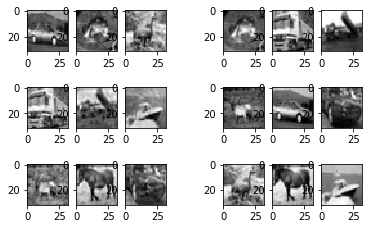

In [18]:
 imageDataGenerator(zca_whitening=True)



### rotation range

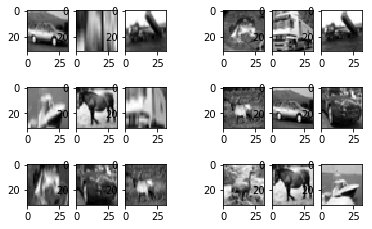

In [20]:
imageDataGenerator(
        zca_whitening=False,
        rotation_range=90)


### width_shift_range and height_shift_range

fraction of total width, if < 1, or pixels if >= 1.

datagen = ImageDataGenerator(
        zca_whitening=False,
        width_shift_range=0.2,
        height_shift_range=0.3)
datagen.fit(img1.reshape(img1.shape[0], 1, 28, 28))

img11=[]
j=0
for X_batch, y_batch in datagen.flow(img1.reshape(img1.shape[0], 1, 28, 28), y_train[[0,1,2,3,4,5,6,7,8]], batch_size=9):
    for i in range(0, 9):
        plt.subplot(330+ 1 + i)
        plt.imshow(X_batch[i][0], cmap=plt.get_cmap('gray'))        
        img11.append(X_batch[i])
    plt.show()
    break


### zoom_range

Float or [lower, upper]. Range for random zoom. If a float, [lower, upper] = [1-zoom_range, 1+zoom_range].

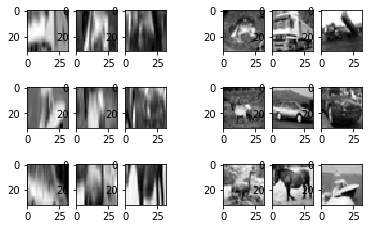

In [21]:
imageDataGenerator(
        zca_whitening=False,
        zoom_range=[0.2,0.3])


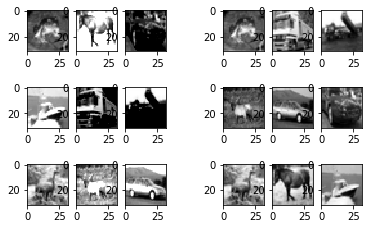

In [22]:

imageDataGenerator(
        zca_whitening=False,
        channel_shift_range=0.52)


### fill_mode and cval

One of {"constant", "nearest", "reflect" or "wrap"}. Default is 'nearest'. Points outside the boundaries of the input are filled according to the given mode:

    'constant': kkkkkkkk|abcd|kkkkkkkk (cval=k)
    'nearest': aaaaaaaa|abcd|dddddddd
    'reflect': abcddcba|abcd|dcbaabcd
    'wrap': abcdabcd|abcd|abcdabcd
    
cval: Float or Int. Value used for points outside the boundaries when fill_mode = "constant".


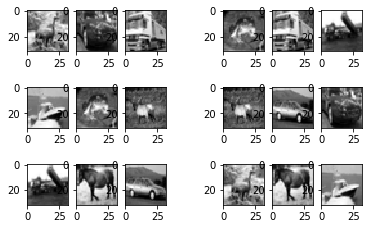

In [23]:
imageDataGenerator(fill_mode='constant',cval=1)

### horizontal_flip and vertical_flip

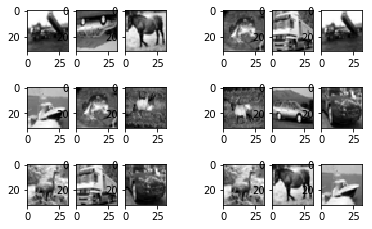

In [24]:
imageDataGenerator(horizontal_flip=True,vertical_flip=True)

### rescale    

[55. 59. 68.]
[0.21568629 0.23137257 0.26666668]


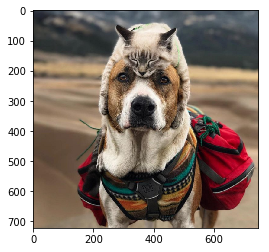

In [29]:
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import numpy as np
from matplotlib import pyplot

img = load_img('capture102.png')
img_arr = np.expand_dims(img_to_array(img), axis=0)
print(img_arr[0][0][0])
datagen = ImageDataGenerator(rescale=1./255)

for batch in datagen.flow(img_arr, batch_size=1):
    print(batch[0][0][0])
    plt.imshow(batch[0])
    plt.show()
    break

### preprocessing_function

#### Histograms Equalization in OpenCV

In [27]:
import cv2
def hist_equal(imgq):
    equ = cv2.equalizeHist(np.uint8(cv2.normalize(imgq[0], None, 0, 255, cv2.NORM_MINMAX)))
    equ=equ/255
    equ=np.array([equ])
    return equ

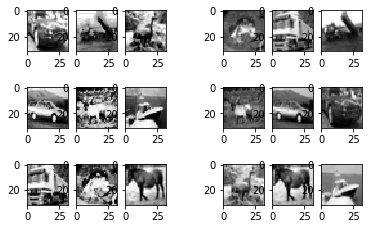

In [28]:
imageDataGenerator(preprocessing_function=hist_equal)